In [1]:
# The normal imports
import numpy as np
from numpy.random import randn, random, randint
from pandas import *
from pandas import Series, DataFrame
import pandas as pd

#These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Longest Name: Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)
Total Survival Percentage: 0.38
Male Survival Percentage: 0.19
Female Survival Percentage: 0.74
Average Ticket Cost: 32.20


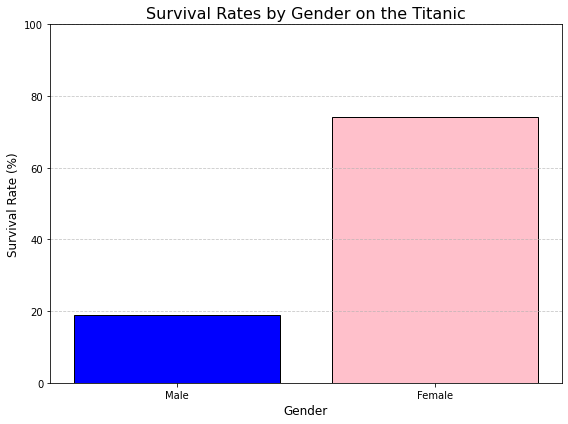

In [4]:
import csv
filename = "titanic.csv"
# Step 0: Identify collumns.
# In this step you will be making several variables to keep track of the 
# indexes of the csv file for the assignment.
# To do this, open the file seperately and find which index matches which step.
# These indexes will be used in future functions in later steps.
# name_index corresponds to the name column.
# surv_index corresponds to the survived column.
# sex_index corresponds to the sex column.
# fare_index corresponds to the fare column.
name_index = 3
surv_index = 1
sex_index = 4
fare_index = 9


# Step 1: csv_reader(file)
# reads a file using csv.reader and returns a list of lists
# with each item being a row, and rows being the values
# in the csv row. Look back at the CSV lab on reading csv files into a list.
# Because this file has a header, you will need a skip it.
def csv_reader(file):
    with open(file, newline = '') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        return [row for row in reader]

def longest_passenger_name(passenger_list):
    longest_name = ""
    for passenger in passenger_list:
        name = passenger[name_index]
        if len(name) > len(longest_name):
            longest_name = name
    return longest_name



###    max_name = ""
#    for n in passenger_list[name_index]:
#        if len(n) > len(max_name):
#            max_name = n
###    return max_name
        
# Parameter: list
# returns the longest name in the list.

#Step 3

def total_survival_percentage(passenger_list):
    survived = 0
    total = len(passenger_list)
    for passenger in passenger_list:
        if passenger[surv_index] == '1':
            survived = survived + 1
    return survived / total
            
    
# Parameter: list
# returns the total percentage of people who survived in the list.
# NOTE: survival in the sheet is denoted as a 1 while death is denoted as a 0.

# Step 4: 
def survival_rate_gender(passenger_list):
    male_survived = 0
    female_survived = 0
    male_total = 0
    female_total = 0
    total = len(passenger_list)
    for passenger in passenger_list:
        if passenger[sex_index] == 'male':
            male_total += 1
            male_survived += int(passenger[surv_index])
        elif passenger[sex_index] == 'female':
            female_total += 1
            female_survived += int(passenger[surv_index])
    return (male_survived / male_total, female_survived / female_total)
    
# Parameter: list
# returns: a tuple containing the survival rate of each gender in the form of male_rate, female_rate.

# Step 5: 
def average_ticket_fare(passenger_list):
    average = 0
    for passenger in passenger_list:
        average = average + float(passenger[fare_index])
    return average / len(passenger_list)
        
# Parameter: list
# returns the average ticket fare of the given list.

# Step 6: main
# This is the function that will call all of the functions you have written in the previous steps.

#Step 7 Generate plot

def create_gender_survival_chart(male_rate, female_rate):
    genders = ['Male', 'Female']
    rates = [male_rate * 100, female_rate * 100]  # Convert to percentages

    plt.figure(figsize=(8, 6))
    plt.bar(genders, rates, color=['blue', 'pink'], edgecolor='black')
    plt.title('Survival Rates by Gender on the Titanic', fontsize=16)
    plt.ylabel('Survival Rate (%)', fontsize=12)
    plt.xlabel('Gender', fontsize=12)
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the chart
    plt.savefig('gender_survival_chart.png')  # Save the chart as a PNG file
    plt.show()

def main():
    x = csv_reader('titanic.csv')
    a,b = survival_rate_gender(x)
    
    passenger_list = csv_reader(filename)
    male_rate, female_rate = survival_rate_gender(passenger_list)
    
    print(f'Longest Name: {longest_passenger_name(x)}')
    print(f'Total Survival Percentage: {total_survival_percentage(x):.2f}')
    print(f'Male Survival Percentage: {a:.2f}')
    print(f'Female Survival Percentage: {b:.2f}')
    print(f'Average Ticket Cost: {average_ticket_fare(x):.2f}')
    
    create_gender_survival_chart(male_rate, female_rate)

if __name__ == '__main__':
    main()